# Base de Dados

A base de dados a ser analisada consiste em registros de acidentes de trânsito na cidade de Belo Horizonte. A base é separada em vários arquivos csv que podem ser lidos diretamente com babypandas. Para isso, use o código abaixo:

In [3]:
import babypandas as bpd
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

df = bpd.DataFrame()
for f in glob.glob('dados/*.csv'):
    aux = bpd.read_csv(f, sep=';')
    df = df.append(aux)

### Colando um índice de datas

Infelizmente, o BabyPandas não lida muito bem com datas. Por isso, vamos tratar as datas usando pandas. A função pd.to_datetime converte texto em datas, funcionando bem no nosso caso.

In [4]:
data_correta = pd.to_datetime(
    df.get('data hora_boletim').values
)

Agora basta colocar a data na coluna correta

In [5]:
df = df.assign(
    data_boletim = data_correta
)

### Removendo as colunas que não precisamos

Por fim, vamos remover todas as colunas desnecessárias e configurar um índice.

In [6]:
df = df.drop(
    columns=['data hora_boletim',
             'data_inclusao',
             'valor_ups',
             'valor_ups_antiga',
             'data_alteracao_smsa',
             'descricao_ups_antiga']
).sort_values(by='data_boletim').set_index('data_boletim')
df

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,descricao_ups,ano,mes,lat,lon,bairro
data_boletim,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:30:00,2016-008685542-001,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,POLICIA CIVIL,...,610820.43,7801707.67,SIM,NÃO,NÃO INFORMADO,2016,1,-43.941446,-19.877669,Parque São João Batista
2016-01-01 01:00:00,2016-001865528-001,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA CIVIL,...,616043.53,7799563.76,SIM,NÃO,NÃO INFORMADO,2016,1,-43.891427,-19.896736,Casa Branca
2016-01-01 01:30:00,2016-014489036-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA CIVIL,...,610686.91,7805465.91,SIM,NÃO,NÃO INFORMADO,2016,1,-43.942946,-19.843720,Padre Júlio Maria
2016-01-01 02:55:00,2016-000009920-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA MILITAR,...,610958.28,7806566.34,SIM,NÃO,NÃO INFORMADO,2016,1,-43.940421,-19.833761,Santa Isabel
2016-01-01 03:00:00,2016-000207284-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,POLICIA CIVIL,...,611496.74,7793765.15,SIM,NÃO,NÃO INFORMADO,2016,1,-43.934506,-19.949393,Sion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:08:00,2022-057273258-001,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,23,NORTE,POLICIA MILITAR,...,612239.23,7810127.89,SIM,NÃO,NÃO INFORMADO,2022,12,-43.928406,-19.801509,Conjunto Zilah Spósito
2022-12-31 20:16:00,2022-057287120-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,19,CENTRO-SUL,POLICIA MILITAR,...,612986.62,7795656.61,SIM,NÃO,NÃO INFORMADO,2022,12,-43.920387,-19.932217,São Lucas
2022-12-31 20:29:00,2022-057285174-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA MILITAR,...,615392.56,7798300.78,SIM,NÃO,NÃO INFORMADO,2022,12,-43.897566,-19.908186,Belém


2. Faça um gráfico de linhas por ano mês indicando o número de acidentes naquele ano mês.

<Axes: xlabel='ano,mes'>

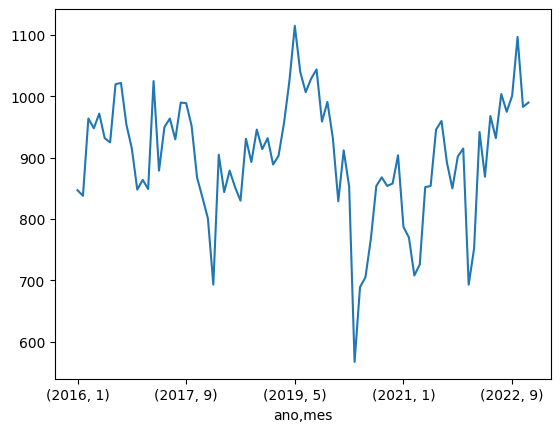

In [7]:
grouped_by_month = df.groupby(['ano', 'mes']).size()
grouped_by_month.plot(kind='line')

3. Repita o gráfico acima por ano apenas.

<Axes: xlabel='ano'>

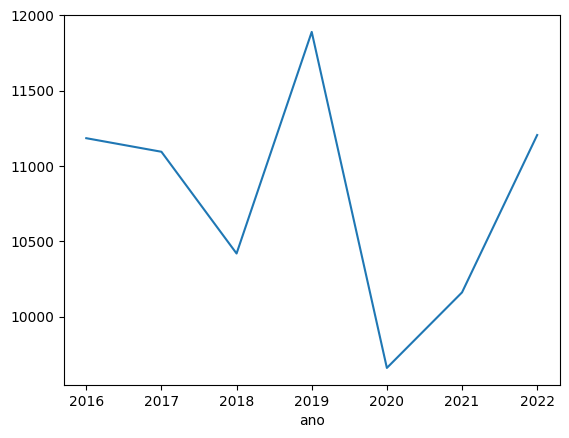

In [8]:
grouped_by_year = df.groupby('ano').size()
grouped_by_year.plot(kind='line')

4. Faça um gráfico de barras por ano indicandos os tipos de acidentes mais comuns no ano.

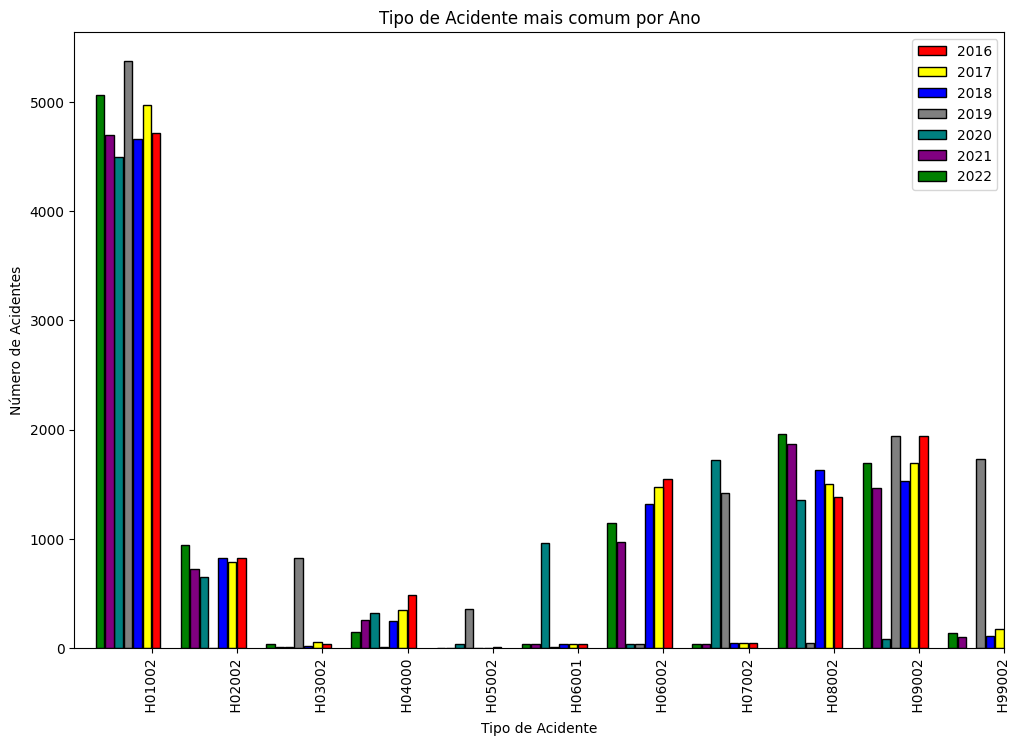

In [9]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
colors = ['red', 'yellow', 'blue', 'gray', 'teal', 'purple', 'green']

spacing = 1
bar_width = 0.1
num_accident_kinds = df.groupby('tipo_acidente').size()

plt.figure(figsize=(12, 8))
for i, year in enumerate(years):
    accidents_per_year = df[df.get('ano') == year].groupby('tipo_acidente').size()
    ax = accidents_per_year.plot(kind='bar', color=colors[i], position=i * (bar_width + spacing), width=bar_width, label=year, edgecolor='black')

plt.title('Tipo de Acidente mais comum por Ano')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.legend()

plt.show()

5. Repita o gráfico acima considerando gráficos fatais e não fatais.

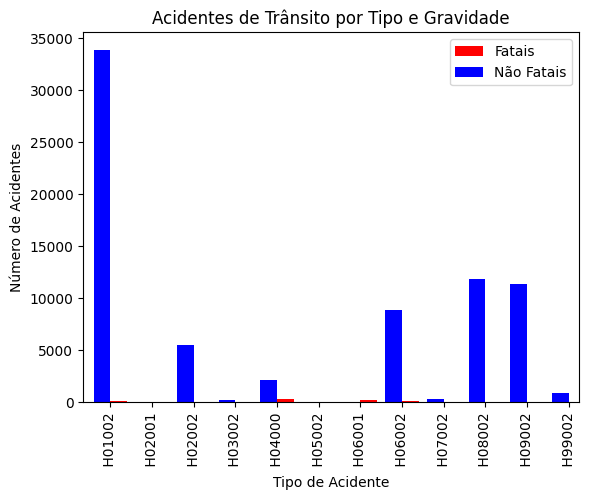

In [10]:
fatals = df[df.get('indicador_fatalidade') == 'SIM'].groupby('tipo_acidente').size()
non_fatals = df[df.get('indicador_fatalidade') == 'NÃO'].groupby('tipo_acidente').size()

ax = fatals.plot(kind='bar', color='red', position=0, width=0.4, label='Fatais')
non_fatals.plot(kind='bar', color='blue', position=1, width=0.4, ax=ax, label='Não Fatais')

plt.title('Acidentes de Trânsito por Tipo e Gravidade')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.legend()

plt.show()

6. Faça a mesma análise por bairro e por acidentes fatais e não fatais

7. Plotar Mapa de Belo Horizonte por Tipo de Acidente:
- Faça um gráfico de dispersão das latitudes e longitudes. O mesmo deve parecer com o mapa de BH.  
Para entender bem os tipos de acidentes, faça gráficos por tipos diferentes de acidentes.